# Lab 1: Support Stuff

## Overview
The purpose of this lab is to explore and reinforce some of the concepts related to DSP algorithms as implemented on the Arm Cortex-M4 on the STM32F411E DISCO. This notebook provides some support functionality that complements the main instructions of the lab. 

If you need a refresher of some of the code, please check out Lab -1

In [2]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

from thinkdsp import CosSignal, SinSignal, SquareSignal, Wave, read_wave
from thinkdsp import decorate
from IPython.display import Audio

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io.wavfile import read

# Raw reading

In Lab 1, we will manipulate signals that are stored in memory. To make things a little bit easier, we can use Python to plot/listen to some of the signals. To investigate the signals, you should upload the .wav/.bin/.raw file to the same directory as this notebook.

If we are reading a .wav, we will use scipy's ```read``` function. Otherwise, we will use the built-in file reading capabilities of Python together with numpy.  

In [8]:
# example, read a binary file into an array of float32
rawdata = open("a440_32f.raw", "rb").read()
data = np.frombuffer(rawdata, dtype=np.float32)

We can then plot the acquired data:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


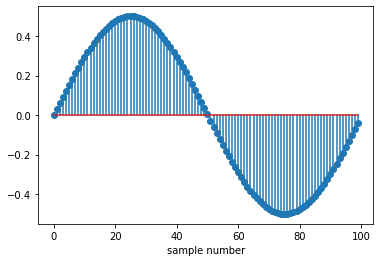

In [10]:
# now let's plot the first 40 samples
no_of_samples_to_plot = 100
plt.stem(range(0,no_of_samples_to_plot), data[:no_of_samples_to_plot])
plt.xlabel("sample number")
plt.show()

We can use ThinkDSP's helpful functions too. Just remember to set the framerate as per the individual file.

In [13]:
wave = Wave(data, framerate=44100)
wave.make_audio()

# Wav reading
Wav files have some header information, which makes them not as useful to directly read. No problem though, because we'll use scipy's ```read``` function. ```read``` returns two values, the sampling rate (which is stored in the header of the Wav file) and the actual data itself. 

Let's start with a wav file that comprises float32 values

In [18]:
sampling_rate, wavedata = read("a440_32f.wav")
print("Sampling rate is: " + str(sampling_rate) + "kHz")

Sampling rate is: 44100kHz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [20]:
wavedata # you should see this as float32

array([ 0.        ,  0.03132416,  0.06252526, ..., -0.09348072,
       -0.06252526, -0.03132416], dtype=float32)

We can do something similar even if the wav actually has signed 16-bit data

In [22]:
sampling_rate2, wavedata2 = read("a440_16-bit.wav")
print("Sampling rate is: " + str(sampling_rate2) + "kHz")
wavedata2

Sampling rate is: 44100kHz


array([    0,  1026,  2050, ..., -3062, -2050, -1026], dtype=int16)

Notice you can listen to what's going on with ThinkDSP's functions

In [36]:
new_wave = Wave(wavedata2, framerate=sampling_rate2)
new_wave.make_audio()

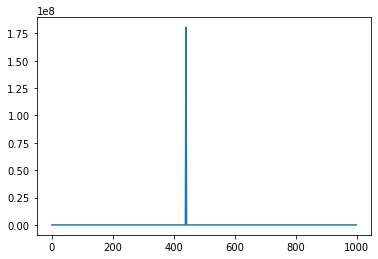

In [27]:
spectrum = new_wave.make_spectrum()
spectrum.plot(high=1000)

There's nothing stopping you from adding/combining signals, **but** you must make sure you are converting between data types correctly.

In [37]:
c523 = SinSignal(freq=523.251, amp=0.5)
c523_wave = c523.make_wave(duration=0.5, framerate=44100)
c523_wave.ys

array([ 0.        ,  0.0372408 ,  0.07427472, ..., -0.26766055,
       -0.29837248, -0.32742689])

In [38]:
c523_wave.make_audio()

Check the range of the signal we created. If we're in the range [-1,1) then we can use our usual tricks!

In [52]:
maximum = max(c523_wave.ys)
minimum = min(c523_wave.ys)
print("max: " + str(maximum) + ", min: " + str(minimum))

max: 0.4999999984704374, min: -0.49999999957907226


In [57]:
 c523_int16 = (c523_wave.ys * 32768).astype(np.int16)
 c523_int16_wave = Wave(c523_int16, framerate = 44100)
 c523_int16_wave.make_audio()

In [59]:
mix = c523_int16_wave + new_wave
mix.make_audio()

You can also write the new signal back to a binary file if you want

In [71]:
mix.ys.astype(np.int16).tofile("mixed.bin")